<a href="https://colab.research.google.com/github/andygoosh/samsung/blob/master/workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [217]:
from pathlib import Path
from google.colab import files, drive
from collections import defaultdict

import pandas as pd
import numpy as np
from numpy import array, argmax, random, take
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

drive.mount('/content/gdrive')
data_path = Path('/content/gdrive') / 'My Drive/Samsung'


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [39]:
dict = defaultdict(list)
rus_trn = []
rem = []
with open(data_path / 'transcriptions') as f:  
  for line in f: 
    rus, trn = line.split('\t')
    rus_trn.append([rus.strip(), trn.strip()])

rus_trn = array(rus_trn)
len(rus_trn)
rus_trn[24]
# rem[24:26]

array(['отношение числа городских и сельских жителей четыре к одному',
       "%% a t n a sh e'1 n' 'ix' jax' # ch' 'i s l a1 # g ax r a ts k' 'i1 h # y' _ s' 'e'1 l' s k' 'ix gh # zh y'1 t' 'ix' l' 'ix' j' %% %% ch' 'i t y'1 r' 'ix # k _ ax d n a m u1 %%"],
      dtype='<U303')

Unique phrases: 3130 out of 50277, Anomalies: 1


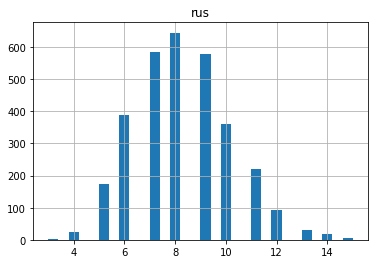

In [211]:
import re

eng_l = []
deu_l = []

anomaly = []

seen = defaultdict(list)
chars = Counter()

# populate the lists with sentence lengths
for j,i in enumerate(rus_trn):
      rus = i[0].split()
      trn = re.split('#|_|% %|%% %%',i[1])

      if not i[0] in seen:
        if abs(len(rus) - len(trn)) > 1: 
          anomaly.append(i)
        else:
          eng_l.append(len(rus))
          deu_l.append(len(trn))

        chars += Counter(i[0])  

      seen[i[0]].append(j)

pd.DataFrame({'rus':eng_l}).hist(bins = 30);
print(f'Unique phrases: {len(eng_l)} out of {len(rus_trn)}, Anomalies: {len(anomaly)}')

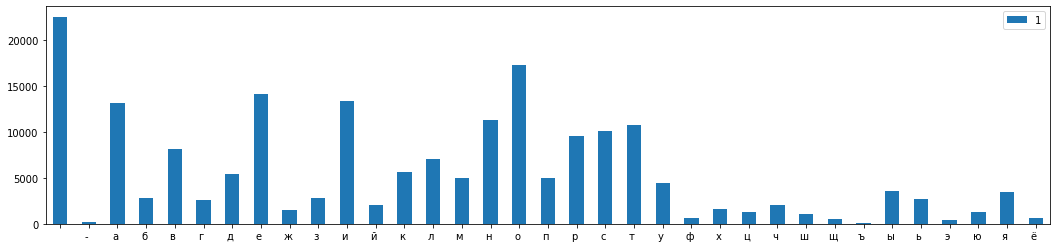

In [204]:
s = sorted(chars.items())
pd.DataFrame(s, index=(e[0]+' ' for e in s)).plot.bar(figsize=(18,4), rot=0);

In [0]:
{each[0]: len(each[1]) for each in seen.items()}

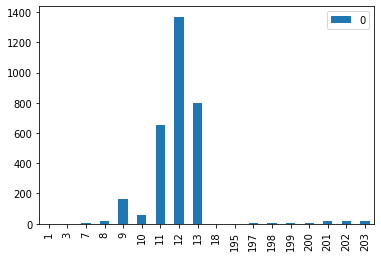

In [228]:
lens = [len(each[1]) for each in seen.items()]
unq = np.unique(lens)
qty = [lens.count(each) for each in unq]
pd.DataFrame(qty, index=unq).plot.bar();